## PCA

In [673]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=["diagnosis"]) #original data without outliers
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [674]:
pca = PCA()

sc_training = StandardScaler()
X_train = sc_training.fit_transform(X_train)
X_test = sc_training.transform(X_test)

X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.fit_transform(X_test)

print(pca.explained_variance_)

[1.39497532e+01 3.89530531e+00 2.63454386e+00 1.59996032e+00
 1.28938941e+00 9.27896036e-01 5.86798791e-01 3.78367133e-01
 2.84649866e-01 2.51810838e-01 2.16753731e-01 1.77526396e-01
 1.39201797e-01 8.51677237e-02 7.25281711e-02 5.37016837e-02
 3.55848870e-02 2.62980370e-02 2.40932930e-02 2.20765117e-02
 1.53535873e-02 1.36136081e-02 9.40383378e-03 8.97493778e-03
 7.54535478e-03 3.90402595e-03 3.53036503e-03 1.09303596e-03
 2.83731125e-04 7.36244958e-05]


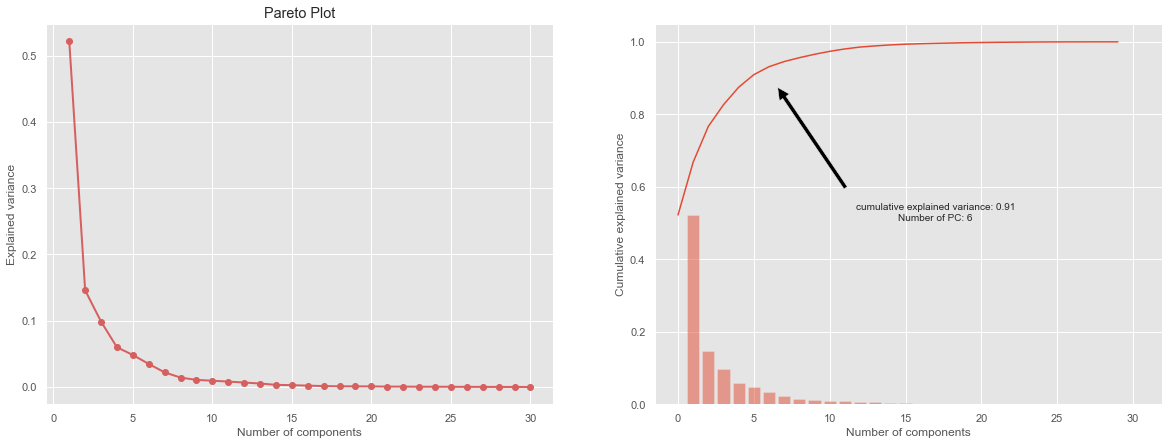

In [675]:
# Eigenvalues
Eigen_Values = pca.explained_variance_
ell = pca.explained_variance_ratio_


# Scree plot
plt.subplots(1, 2, figsize = (20, 7))

ax1 = plt.subplot(1, 2, 1)
x = np.arange(len(Eigen_Values)) + 1
ax1.plot(x, Eigen_Values / Eigen_Values.sum(), 'ro-', lw=2)
ax1.set_xticks(x, ["" + str(i) for i in x])
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance')
ax1.set_title('Scree Plot')

# Pareto plot
ax2 = plt.subplot(1, 2, 2)
ind = np.arange(1, len(ell) + 1)
ax2.bar(ind, ell, align='center', alpha=0.5)
ax2.plot(np.cumsum(ell))
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Cumulative explained variance')
ax1.set_title('Pareto Plot')

for x, y in zip(ind, np.cumsum(ell)):
    label = "{:.2f}".format(y)
    if float(label) >= 0.9:
        plt.annotate("cumulative explained variance: " + label + "\n" +
                     "Number of PC: " + str(x),  # this is the text
                     (x, y),  # this is the point to label
                     textcoords='figure fraction',  # how to position the text
                     xytext=(.8, 0.5),  # distance from text to points (x,y)
                     arrowprops=dict(facecolor='black', shrink=0.1),
                     horizontalalignment='left',
                     verticalalignment='bottom',
                     ha='center')  # horizontal alignment can be left, right or center
        NUMBER_OF_PCs = x # for further use
        break

The First 6 Features Could Represent 90 Percents of the iarance
0.9094771329719767


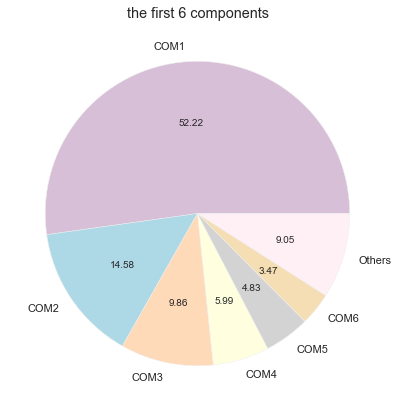

In [676]:
threshold = 0.85
for_test = 0
order = 0
for index,ratio in  enumerate (pca.explained_variance_ratio_):
    if threshold>for_test:
        for_test+= ratio
    else:
        order = index + 1
        break

print( 'The First %d Features Could Represent 90 Percents of the iarance' % order )
print( pca.explained_variance_ratio_[:order].sum() )
com_col = [ 'COM'+str(i+1) for i in range(order) ]
com_col.append('Others')
com_value = [ i for i in pca.explained_variance_ratio_[:order] ]
com_value.append( 1-pca.explained_variance_ratio_[:order].sum() )
com_colors = ['thistle', 'lightblue', 'peachpuff','lightyellow', 'lightgrey', 'wheat','lavenderblush']
plt.figure( figsize=[7,7] )
plt.pie( x=com_value,labels=com_col,colors=com_colors,autopct='%.2f' )
plt.title( 'the first 6 components' )
plt.show()


In [677]:
#Match the labels of components
pc = pca.components_[:6]
pc = pd.DataFrame(pc)
pc.columns = data.drop(['diagnosis'],axis = 1).columns.values
for i in range(len(pc)):
    pc1 = pc.iloc[i]
    #print('component {}:\n {}\n'.format(i+1,pc1[abs(pc1)>=0.2]))
    

pc.index = ['PC_1', 'PC_2', 'PC_3', 'PC_4','PC_5','PC_6']
pc

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC_1,0.200257,0.090353,0.211830,0.201792,0.179880,0.252134,0.285753,0.274684,0.174533,0.087687,...,0.205805,0.097537,0.215770,0.200149,0.149502,0.209424,0.237420,0.230942,0.115074,0.152577
PC_2,-0.257960,-0.090329,-0.240845,-0.251869,0.181878,0.132780,-0.011205,-0.077715,0.072161,0.355845,...,-0.218062,-0.036157,-0.198437,-0.206726,0.203141,0.240344,0.131998,0.018858,0.124034,0.424918
PC_3,-0.049966,-0.010047,-0.046295,-0.024319,0.063592,-0.017681,0.022578,-0.005290,-0.013996,0.060959,...,-0.112029,-0.115893,-0.103478,-0.087580,-0.141734,-0.216034,-0.193949,-0.164767,-0.295958,-0.207334
PC_4,-0.020337,0.540821,-0.022978,-0.032791,-0.363993,-0.048655,-0.023679,-0.089277,-0.158671,-0.058611,...,-0.023582,0.540269,-0.020612,-0.037860,-0.253174,0.131508,0.102247,0.018890,-0.015433,0.144628
PC_5,0.070129,-0.268358,0.076569,0.066153,-0.293431,0.054953,0.067919,0.014473,-0.416995,-0.002844,...,0.021656,-0.303934,0.048240,0.021279,-0.234240,0.133825,0.132731,0.078947,-0.380245,0.115997
PC_6,-0.007073,-0.130425,-0.009892,-0.008100,-0.284626,-0.032243,0.001076,-0.068148,0.219844,-0.065428,...,-0.006482,-0.207539,-0.006085,-0.007167,-0.367322,0.051114,0.063795,-0.078922,0.450238,0.014344


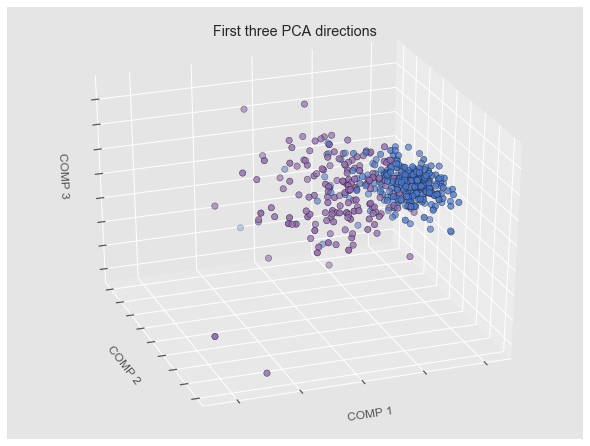

In [678]:
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_train ,y_train)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("COMP 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("COMP 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("COMP 3")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [679]:
pca = PCA(n_components=6)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.fit_transform(X_test)

## Logistic Regression

In [680]:
y_test.replace('M',1,inplace=True)
y_test.replace('B',0,inplace=True)
y_train.replace('M',1,inplace=True)
y_train.replace('B',0,inplace=True)


LR = LogisticRegression(max_iter = 200)
LR.fit(X_train_PCA,y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train_PCA, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of Logistic Regression is: {round(cross_val_score(LR,X_train_PCA,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of Logistic Regression is: 0.965


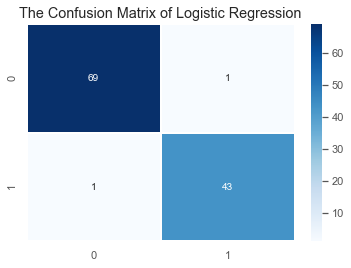

In [681]:
y_pred = LR.predict(X_test_PCA) #Predict data for eveluating 
cmLR = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Logistic Regression')
sns.heatmap(cmLR,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');total_LR=sum(sum(cmLR))


In [682]:
#####from confusion matrix calculate accuracy
accuracy_LR=(cmLR[0,0]+cmLR[1,1])/total_LR
print(f"Accuracy: {round(accuracy_LR, 4)}")

sensitivity_LR = cmLR[0,0]/(cmLR[0,0]+cmLR[1,0])
print(f"Sensitivity: {round(sensitivity_LR, 4)}")

specificity_LR = cmLR[1,1]/(cmLR[0,1]+cmLR[1,1])
print(f"Specificity: {round(specificity_LR, 4)}")

balanced_accuracy_LR=(sensitivity_LR+specificity_LR )*0.5
print(f"Balanced accuracy of Logistic Regression : {round(balanced_accuracy_LR, 4)}")

Accuracy: 0.9825
Sensitivity: 0.9857
Specificity: 0.9773
Balanced accuracy of Logistic Regression : 0.9815


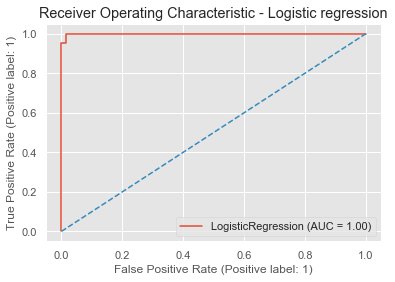

In [683]:
plot_roc_curve(LR, X_test_PCA, y_test);
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Logistic regression');

***

### KNN

Accuracy by using KfoldCrossVal score of KNN is: 0.9561  at K = 5


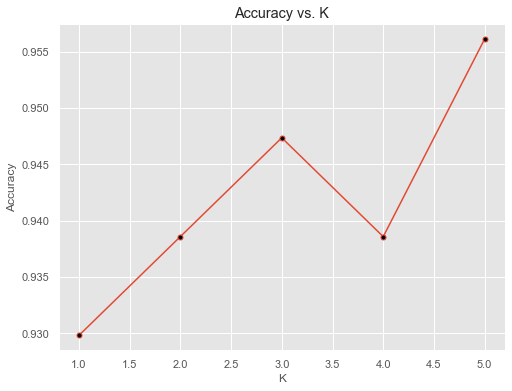

In [684]:
accuracy=[]
for i in range(1, 6):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN = KNN.fit(X_train_PCA, y_train)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
    scores = cross_validate(KNN, X_train_PCA, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    KNN_fit_time = scores['fit_time'].mean()
    KNN_score_time = scores['score_time'].mean()
    KNN_accuracy = scores['test_accuracy'].mean()
    KNN_precision = scores['test_precision_macro'].mean()
    KNN_recall = scores['test_recall_macro'].mean()
    KNN_f1 = scores['test_f1_weighted'].mean()
   
    accuracy.append(KNN.score(X_test_PCA,y_test))

print(f"Accuracy by using KfoldCrossVal score of KNN is: {round(max(accuracy), 4)}"," at K = {}".format(accuracy.index(max(accuracy))+1))

plt.figure(figsize=(8,6))
plt.plot(range(1,6),accuracy, 
         marker='o',markerfacecolor='black', markersize=5)
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy');

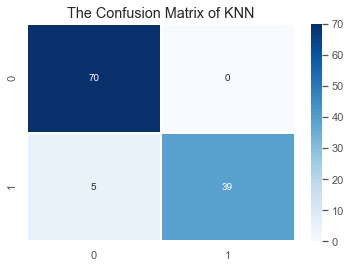

In [685]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN = KNN.fit(X_train_PCA, y_train)
y_pred = KNN.predict(X_test_PCA)
cmKNN = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of KNN')
sns.heatmap(cmKNN,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [686]:
total_KNN=sum(sum(cmKNN))
#####from confusion matrix calculate accuracy
accuracy_KNN=(cmKNN[0,0]+cmKNN[1,1])/total_KNN
print(f"Accuracy: {round(accuracy_KNN, 4)}")

sensitivity_KNN = cmKNN[0,0]/(cmKNN[0,0]+cmKNN[1,0])
print(f"Sensitivity: {round(sensitivity_KNN, 4)}")

specificity_KNN = cmKNN[1,1]/(cmKNN[0,1]+cmKNN[1,1])
print(f"Specificity: {round(specificity_KNN, 4)}")

balanced_accuracy_KNN=(sensitivity_KNN+specificity_KNN )*0.5
print(f"Balanced accuracy of KNN: {round(balanced_accuracy_KNN, 4)}")

Accuracy: 0.9561
Sensitivity: 0.9333
Specificity: 1.0
Balanced accuracy of KNN: 0.9667


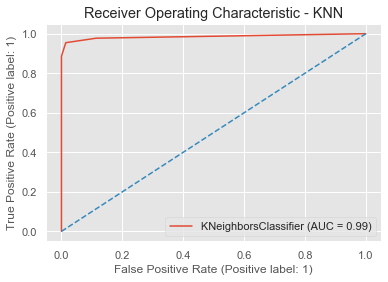

In [687]:
plot_roc_curve(KNN, X_test_PCA, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - KNN');

***

### Naive Bayes

In [688]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(X_train_PCA, y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(NB, X_train_PCA, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
NB_fit_time = scores['fit_time'].mean()
NB_score_time = scores['score_time'].mean()
NB_accuracy = scores['test_accuracy'].mean()
NB_precision = scores['test_precision_macro'].mean()
NB_recall = scores['test_recall_macro'].mean()
NB_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of Naive Bayes is: {round(cross_val_score(NB,X_train_PCA,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of Naive Bayes is: 0.925


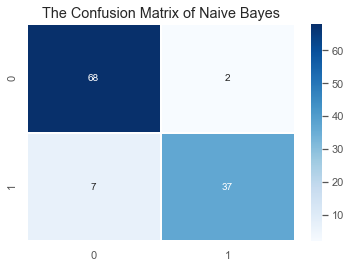

In [689]:
y_pred = NB.predict(X_test_PCA)
cmNB = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Naive Bayes')
sns.heatmap(cmNB,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [690]:
total_NB=sum(sum(cmNB))
#####from confusion matrix calculate accuracy
accuracy_NB=(cmNB[0,0]+cmNB[1,1])/total_NB
print(f"Accuracy: {round(accuracy_NB, 4)}")

sensitivity_NB = cmNB[0,0]/(cmNB[0,0]+cmNB[1,0])
print(f"Sensitivity: {round(sensitivity_NB, 4)}")

specificity_NB = cmNB[1,1]/(cmNB[0,1]+cmNB[1,1])
print(f"Specificity: {round(specificity_NB, 4)}")

balanced_accuracy_NB=(sensitivity_NB+specificity_NB )*0.5
print(f"Balanced accuracy of Naive Bayes: {round(balanced_accuracy_NB, 4)}")

Accuracy: 0.9211
Sensitivity: 0.9067
Specificity: 0.9487
Balanced accuracy of Naive Bayes: 0.9277


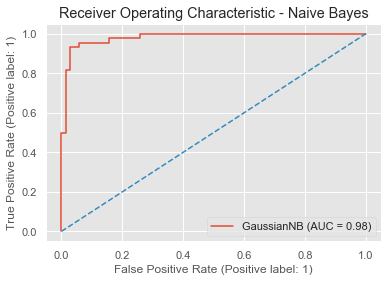

In [691]:
plot_roc_curve(NB, X_test_PCA, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Naive Bayes');

***

### Random Forest

Accuracy by using KfoldCrossVal score of Random Forest is: 0.9737  at N = 3


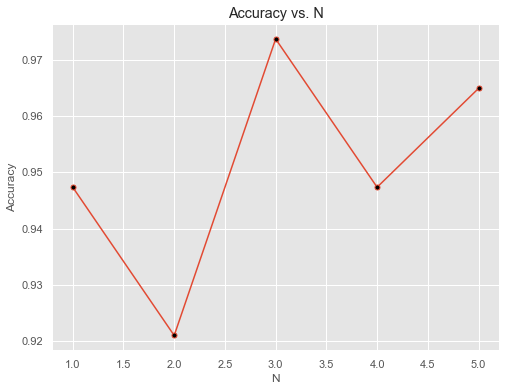

In [692]:
accuracy=[]
for i in range(1, 6):
    RF = RandomForestClassifier(n_estimators = i,random_state=0)
    RF = RF.fit(X_train_PCA, y_train)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
    scores = cross_validate(RF, X_train_PCA, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    RF_fit_time = scores['fit_time'].mean()
    RF_score_time = scores['score_time'].mean()
    RF_accuracy = scores['test_accuracy'].mean()
    RF_precision = scores['test_precision_macro'].mean()
    RF_recall = scores['test_recall_macro'].mean()
    RF_f1 = scores['test_f1_weighted'].mean()
    accuracy.append(RF.score(X_test_PCA,y_test))

print(f"Accuracy by using KfoldCrossVal score of Random Forest is: {round(max(accuracy), 4)}"," at N = {}".format(accuracy.index(max(accuracy))+1))

plt.figure(figsize=(8,6))
plt.plot(range(1,6),accuracy, 
         marker='o',markerfacecolor='black', markersize=5)
plt.title('Accuracy vs. N')
plt.xlabel('N')
plt.ylabel('Accuracy');

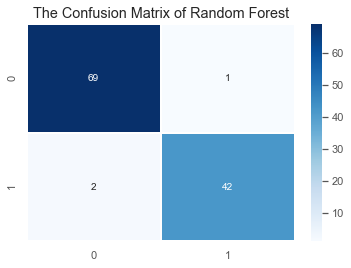

In [693]:
RF = RandomForestClassifier(n_estimators =3,random_state=0)
RF = RF.fit(X_train_PCA, y_train)
y_pred = RF.predict(X_test_PCA)
cmRF = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Random Forest')
sns.heatmap(cmRF,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [694]:
total_RF=sum(sum(cmRF))
#####from confusion matrix calculate accuracy
accuracy_RF=(cmRF[0,0]+cmRF[1,1])/total_RF
print(f"Accuracy: {round(accuracy_RF, 4)}")

sensitivity_RF = cmRF[0,0]/(cmRF[0,0]+cmRF[1,0])
print(f"Sensitivity: {round(sensitivity_RF, 4)}")

specificity_RF = cmRF[1,1]/(cmRF[0,1]+cmRF[1,1])
print(f"Specificity: {round(specificity_RF, 4)}")

balanced_accuracy_RF=(sensitivity_RF+specificity_RF )*0.5
print(f"Balanced accuracy of Random Forest : {round(balanced_accuracy_RF, 4)}")

Accuracy: 0.9737
Sensitivity: 0.9718
Specificity: 0.9767
Balanced accuracy of Random Forest : 0.9743


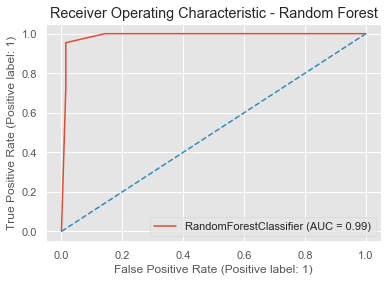

In [695]:
plot_roc_curve(RF, X_test_PCA, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Random Forest');

In [696]:
# Feature Importance
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.columns=['COMP 1','COMP 2','COMP 3','COMP 4','COMP 5','COMP 6']

def FeatureImportance (_model):
    fi = pd.DataFrame({'feature': list(X_train_PCA.columns),
                       'importance': _model.feature_importances_}).sort_values('importance', ascending = False)
    return fi
FeatureImportance(RF)


,feature,importance
0,COMP 1,0.533375
2,COMP 3,0.179194
1,COMP 2,0.142827
4,COMP 5,0.077279
3,COMP 4,0.051558
5,COMP 6,0.015766


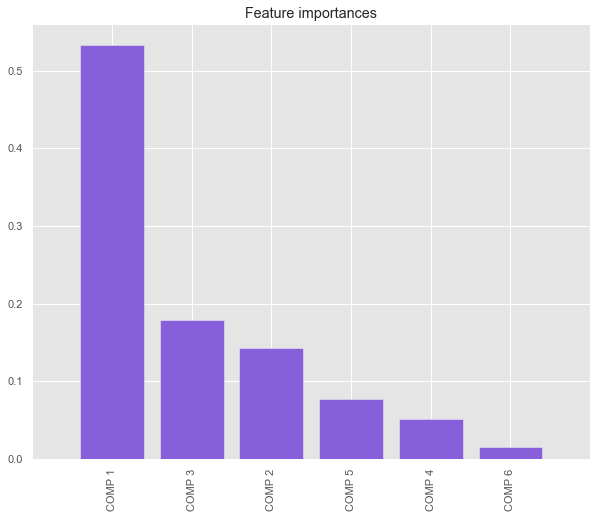

In [697]:
# Plot the feature importances of the forest

importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(1, figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(X_train_PCA.shape[1]), importances[indices],
       color="#875FDB", align="center")
plt.xticks(range(X_train_PCA.shape[1]), X_train_PCA.columns[indices],rotation=90)
plt.xlim([-1, X_train_PCA.shape[1]])
plt.show()

***

### SVM

In [698]:
# Create a Support Vector Classifier

svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train_PCA, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_
svc

SVC(C=10, kernel='linear')

In [699]:
SVM_linear = SVC(kernel='linear',probability = True,C=10)
SVM_linear=SVM_linear.fit(X_train_PCA, y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM_linear, X_train_PCA, y_train, scoring=scoring, cv=10)
sorted(scores.keys())
SVM_linear_fit_time = scores['fit_time'].mean()
SVM_linear_score_time = scores['score_time'].mean()
SVM_linear_accuracy = scores['test_accuracy'].mean()
SVM_linear_precision = scores['test_precision_macro'].mean()
SVM_linear_recall = scores['test_recall_macro'].mean()
SVM_linear_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of SVM (linear) is: {round(cross_val_score(SVM_linear,X_train_PCA,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of SVM (linear) is: 0.9606


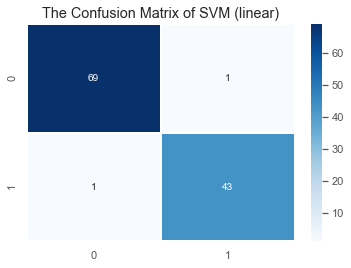

In [700]:
y_pred = SVM_linear.predict(X_test_PCA)
cm_linear = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of SVM (linear)')
sns.heatmap(cm_linear,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [701]:
total_SVM_linear=sum(sum(cm_linear))
#####from confusion matrix calculate accuracy
accuracy_SVM_linear=(cm_linear[0,0]+cm_linear[1,1])/total_SVM_linear
print(f"Accuracy: {round(accuracy_SVM_linear, 4)}")

sensitivity_SVM_linear = cm_linear[0,0]/(cm_linear[0,0]+cm_linear[1,0])
print(f"Sensitivity: {round(sensitivity_SVM_linear, 4)}")

specificity_SVM_linear = cm_linear[1,1]/(cm_linear[0,1]+cm_linear[1,1])
print(f"Specificity: {round(specificity_SVM_linear, 4)}")

balanced_accuracy_SVM_linear=(sensitivity_SVM_linear+specificity_SVM_linear )*0.5
print(f"Balanced accuracy of SVM(linear): {round(balanced_accuracy_SVM_linear, 4)}")

Accuracy: 0.9825
Sensitivity: 0.9857
Specificity: 0.9773
Balanced accuracy of SVM(linear): 0.9815


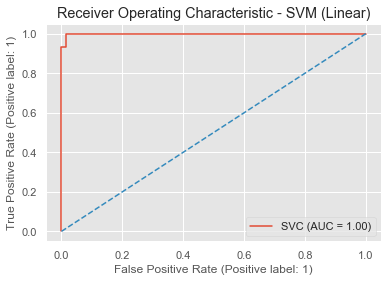

In [702]:
plot_roc_curve(SVM_linear, X_test_PCA, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - SVM (Linear)');

In [703]:
#SVM(rbf)
# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train_PCA, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_
svc

SVC(C=100, gamma=0.001)

In [704]:
SVM_rbf = SVC(kernel='rbf',probability = True,C=100, gamma=0.001)
SVM_rbf=SVM_rbf.fit(X_train_PCA, y_train)
scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM_rbf, X_train_PCA, y_train, scoring=scoring, cv=10)
sorted(scores.keys())
SVM_rbf_fit_time = scores['fit_time'].mean()
SVM_rbf_score_time = scores['score_time'].mean()
SVM_rbf_accuracy = scores['test_accuracy'].mean()
SVM_rbf_precision = scores['test_precision_macro'].mean()
SVM_rbf_recall = scores['test_recall_macro'].mean()
SVM_rbf_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of SVM (rbf) is: {round(cross_val_score(SVM_rbf,X_train_PCA,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of SVM (rbf) is: 0.9584


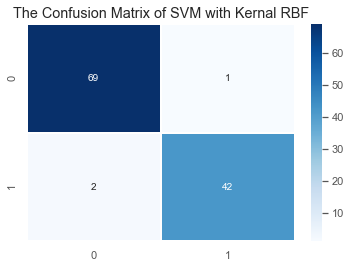

In [705]:
y_pred=SVM_rbf.predict(X_test_PCA)
cm_rbf = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of SVM with Kernal RBF')
sns.heatmap(cm_rbf,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [706]:
total_SVM_rbf=sum(sum(cm_rbf))
#####from confusion matrix calculate accuracy
accuracy_SVM_rbf=(cm_rbf[0,0]+cm_rbf[1,1])/total_SVM_rbf
print(f"Accuracy: {round(accuracy_SVM_rbf, 4)}")

sensitivity_SVM_rbf = cm_rbf[0,0]/(cm_rbf[0,0]+cm_rbf[1,0])
print(f"Sensitivity: {round(sensitivity_SVM_rbf, 4)}")

specificity_SVM_rbf = cm_rbf[1,1]/(cm_rbf[0,1]+cm_rbf[1,1])
print(f"Specificity: {round(specificity_SVM_rbf, 4)}")

balanced_accuracy_SVM_rbf=(sensitivity_SVM_rbf+specificity_SVM_rbf )*0.5
print(f"Balanced accuracy of SVM(rbf) : {round(balanced_accuracy_SVM_rbf, 4)}")

Accuracy: 0.9737
Sensitivity: 0.9718
Specificity: 0.9767
Balanced accuracy of SVM(rbf) : 0.9743


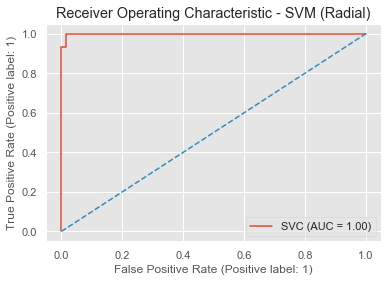

In [707]:
plot_roc_curve(SVM_rbf, X_test_PCA, y_test);
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - SVM (Radial)');

In [708]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression','Random forests','Naive Bayes','K-Nearest Neighbors', 'Support Vector Machine_linear','Support Vector Machine_radial'],
    'Fitting time': [LR_fit_time, RF_fit_time,NB_fit_time, KNN_fit_time,SVM_linear_fit_time,SVM_rbf_fit_time],
    'Scoring time': [LR_score_time,RF_score_time,NB_score_time,  KNN_score_time,SVM_linear_score_time,SVM_rbf_score_time  ],
    'Accuracy'    : [LR_accuracy, RF_accuracy, NB_accuracy, KNN_accuracy,SVM_linear_accuracy,SVM_rbf_accuracy ],
    'Balanced accuracy' :[balanced_accuracy_LR, balanced_accuracy_RF, balanced_accuracy_NB,balanced_accuracy_KNN,balanced_accuracy_SVM_linear, balanced_accuracy_SVM_rbf],
    'Precision'   : [LR_precision, RF_precision, NB_precision, KNN_precision, SVM_linear_precision,SVM_rbf_precision],
    'Recall'      : [LR_recall,RF_recall,NB_recall,KNN_recall,SVM_linear_recall,SVM_rbf_recall],
    'F1_score'    : [LR_f1, RF_f1, NB_f1, KNN_f1, SVM_linear_f1,SVM_rbf_f1],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Balanced accuracy', 'Precision',  'Recall','F1_score'])

models_correlation.sort_values(by='Balanced accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Balanced accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.007008,0.004582,0.965024,0.981494,0.965904,0.961399,0.964743
4,Support Vector Machine_linear,0.023603,0.006150,0.960628,0.981494,0.961438,0.956734,0.960454
1,Random forests,0.007873,0.003441,0.955894,0.974288,0.954843,0.951148,0.955693
5,Support Vector Machine_radial,0.016941,0.008094,0.958406,0.974288,0.964857,0.947401,0.957769
3,K-Nearest Neighbors,0.000860,0.004369,0.962609,0.966667,0.967283,0.954132,0.962034
2,Naive Bayes,0.001506,0.004422,0.925024,0.927692,0.926514,0.913377,0.924550
